In [62]:
import numpy as np
import librosa , soundfile
from scipy import signal
import math
import os, re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Best Band

Use PRAAT to record and save (as .wav file) five different sentences from five of
your friends (both male and female; one sentence from one friend). Use sampling
rate of 16kHz for recording. Now design a band-stop filter with stop-band from
FHz to (F + 1000)Hz. For each recording do the following: <br>
Vary F from 0Hz to 7000Hz in a step of 500Hz and for each of the choice of F,
band-stop filter the original recording and save the filtered signal as .wav file. Listen
the filtered .wav file and compare with the original .wav file to give your score of
distortion in the filtered signal in a scale of 0-10 (10 - filtered and original identical,
0 - they are different). <br>
Tabulate the score for all five recordings and different F and report which 1kHz
band results in the best score for each of five recordings? If the best band is different
for different recordings, argue why that could be so.

In [66]:
fs=16_000 # sampling freq

# Create Filtered versions of each of the wav files and save them in appropriate destination folder
wav_file_path = './hw2_recorded_wav_files'
filtered_file_path = 'hw2_filtered_wav_files'

ws1_variation = 1.1 # Value of lower ws compared to lower wp
ws2_variation = 0.9 # Value of higher ws compared to higher wp


In [50]:
# function to convert frequencies in Hz to normalized frequences in the range of 0 to 1 where 1 = Nyquist Freq
def convert_freq(fs, f):
    return f*2/fs


Frequncies = [0, 1000], filter order= 10, cut off Freq = 0.12 rad/s 
Frequncies = [500, 1500], filter order= 10, cut off Freq = [0.0625, 0.1875] rad/s 
Frequncies = [1000, 2000], filter order= 10, cut off Freq = [0.125, 0.25] rad/s 
Frequncies = [1500, 2500], filter order= 10, cut off Freq = [0.1875, 0.3125] rad/s 
Frequncies = [2000, 3000], filter order= 10, cut off Freq = [0.25, 0.375] rad/s 
Frequncies = [2500, 3500], filter order= 10, cut off Freq = [0.3125, 0.4375] rad/s 
Frequncies = [3000, 4000], filter order= 10, cut off Freq = [0.375, 0.5] rad/s 
Frequncies = [3500, 4500], filter order= 10, cut off Freq = [0.4375, 0.5625] rad/s 
Frequncies = [4000, 5000], filter order= 10, cut off Freq = [0.5, 0.625] rad/s 
Frequncies = [4500, 5500], filter order= 10, cut off Freq = [0.5625, 0.6875] rad/s 
Frequncies = [5000, 6000], filter order= 10, cut off Freq = [0.625, 0.75] rad/s 
Frequncies = [5500, 6500], filter order= 10, cut off Freq = [0.6875, 0.8125] rad/s 
Frequncies = [6000, 7000]

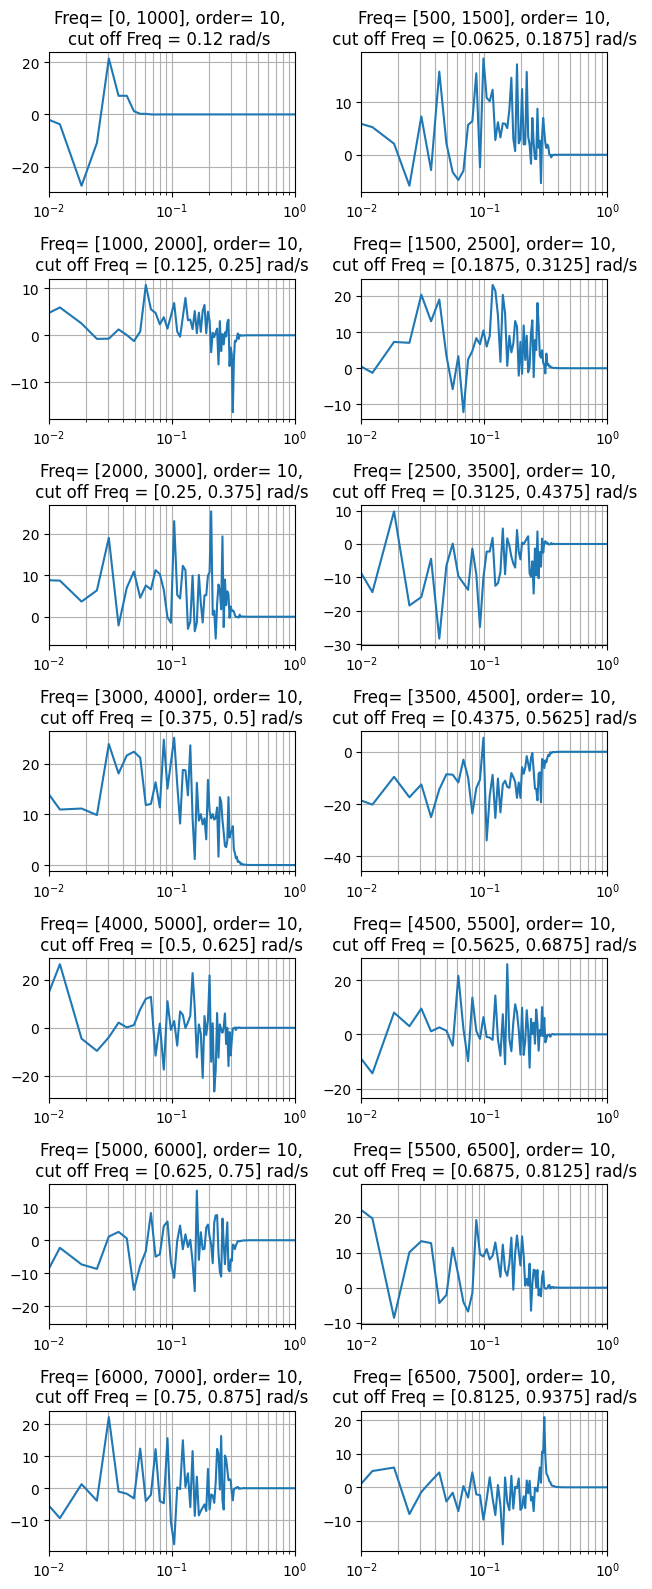

In [64]:

filter = []
ncols = 2
nrows = 7
# plt.figure(figsize=(6, 16))
fig, ax = plt.subplots(nrows,ncols)
fig.set_figheight(16)
fig.set_tight_layout(tight=True)

for filter_index, F in enumerate(range(0, 7000, 500)):
    F2 = F + 1000 
    g_pass=0.6 # Max loss in the pass band in dB
    g_stop=40 # Attenuation in the stop band in dB

    if F == 0:
        # This is a high pass filter, in all other cases, it is a band stop filter
        wp = convert_freq(fs, F2)
        ws = ws1_variation*wp
        filter_type = 'highpass'
    else:
        wp = [convert_freq(fs,F), convert_freq(fs,F2)]
        ws= [ws1_variation*convert_freq(fs, F), ws2_variation*convert_freq(fs,F2)]
        filter_type='bandstop'

    N, wn = signal.buttord(wp, ws, g_pass, g_stop)


    N = 10
    wn = wp
    if isinstance(wn, float):
        print('Frequncies = [{}, {}], filter order= {}, cut off Freq = {:.2f} rad/s '.format(F, F2, N, wn))
    else:
        # temp = np.array2string(wn, formatter={'float': lambda x: f'{x:.2f}'}, separator=', ')

        temp = wn#, formatter={'float': lambda x: f'{x:.2f}'}, separator=', ')
        print('Frequncies = [{}, {}], filter order= {}, cut off Freq = {} rad/s '.format(F, F2, N, temp))

    b, a= signal.butter(N,wn, btype=filter_type, analog=False, output='ba', fs=fs )

    w,h = signal.freqz(b,a,512)

    # Plot the filter frequency response
    
    ax[filter_index//ncols, filter_index%ncols].semilogx(w, 20*np.log10(abs(h)))
    ax[filter_index//ncols, filter_index%ncols].set_xlim([1e-2,1.0])
    ax[filter_index//ncols, filter_index%ncols].grid(which='both', axis='both')

    if isinstance(wn, float):

        ax[filter_index//ncols, filter_index%ncols].set_title('Freq= [{}, {}], order= {}, \ncut off Freq = {:.2f} rad/s '
                                            .format(F, F2, N, wn))
    else:
        # temp = np.array2string(wn, formatter={'float': lambda x: f'{x:.2f}'}, separator=', ')
        temp = wn # np.array2string(wn, formatter={'float': lambda x: f'{x:.2f}'}, separator=', ')
        ax[filter_index//ncols, filter_index%ncols].set_title('Freq= [{}, {}], order= {},\n cut off Freq = {} rad/s '
                                            .format(F, F2, N, temp))
    # Save the filter coefficients for filtering signals downstream
    filter.append([F, F2, b,a])

plt.show()
            


In [69]:
len(filter)

14

In [71]:



for file in os.listdir(wav_file_path):
    if re.search('^01best_band.*wav$', file) is not None:
        # wav file belongs to current question
        data, fs = librosa.load(os.path.join(wav_file_path,file))
        # Create loop to vary filter stop band from

        for F, F2, b, a in filter:
            print(F, F2)
            y = signal.lfilter(b, a, data)
            filename=file.replace(".wav", "{}_{}.wav".format(F, F2))
            soundfile.write(os.path.join(filtered_file_path,filename), y, fs)
        


0 1000
500 1500
1000 2000
1500 2500
2000 3000
2500 3500
3000 4000
3500 4500
4000 5000
4500 5500
5000 6000
5500 6500
6000 7000
6500 7500
